### Probability of Loan Defaulters
For this project, we will be exploring the publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). As an investor one would want to invest in people who showed a profile of having a high probability of paying the amount back.

##### Problem Statement
What is the probability that the borrower paid back their loan in full?

* Feature : Description
* customer.id : ID of the customer
* credit.policy : If the customer meets the credit underwriting criteria of LendingClub.com or not
* purpose : The purpose of the loan(takes values :"creditcard", "debtconsolidation", "educational", "majorpurchase", "smallbusiness", and "all_other").
* int.rate : The interest rate of the loan
* installment : The monthly installments owed by the borrower if the loan is funded
* log.annual.inc : The natural log of the self-reported annual income of the borrower
* dti : The debt-to-income ratio of the borrower (amount of debt divided by annual income)
* fico : The FICO credit score of the borrower
* days.with.cr.line : The number of days the borrower has had a credit line.
* revol.bal : The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle)
* revol.util : The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available)
* pub.rec : The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments)
* inq.last.6mths : The borrower's number of inquiries by creditors in the last 6 months
* delinq.2yrs : The number of times the borrower had been 30+ days past due on a payment in the past 2 years
* paid.back.loan : Whether the user has paid back loan

In [1]:
#Import librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv("data.csv")
df.head()

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,LA001,Yes,debt_consolidation,11.89%,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,Less than 5,No,Yes
1,LA002,Yes,credit_card,10.71%,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,Less than 5,No,Yes
2,LA003,Yes,debt_consolidation,13.57%,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,Less than 5,No,Yes
3,LA004,Yes,debt_consolidation,10.08%,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,Less than 5,No,Yes
4,LA005,Yes,credit_card,14.26%,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,Less than 5,Yes,Yes


In [4]:
df.describe()

,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000
mean,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,0.062122
std,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,0.262126
min,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000
25%,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000
50%,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,0.000000
75%,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,0.000000
max,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,5.000000


In [8]:
#checking independence between 'fico' > 700 and 'purpose' == 'debt_consolidation'

p_a = len(df[df['fico'].astype(float) > 700]) / len(df)
p_b = len(df[df['purpose'] == 'debt_consolidation']) / len(df)
df1 = df[df['purpose'] == 'debt_consolidation']

p_a_b = len(df1[df1['fico'].astype(float) > 700]) / len(df1)
print('p_a= ' + str(p_a))
print('p_b= ' + str(p_b))
print('p_a_b= ' + str(p_a_b))

result = p_a_b == p_a
print(result)

p_a= 0.5593025683858843
p_b= 0.4131342660263103
p_a_b= 0.489764973464746
False


In [9]:
# Bayes theorem 
prob_lp = len(df[df['paid.back.loan'] == 'Yes'])/ len(df)
prob_cs = len(df[df['credit.policy'] == 'Yes'])/ len(df)
new_df = df[df['paid.back.loan'] == 'Yes']

prob_pd_cs = len(new_df[new_df['credit.policy'] == 'Yes'])/ len(new_df)
bayes = (prob_pd_cs*prob_lp)/ prob_cs
print(bayes)

0.8684824902723735


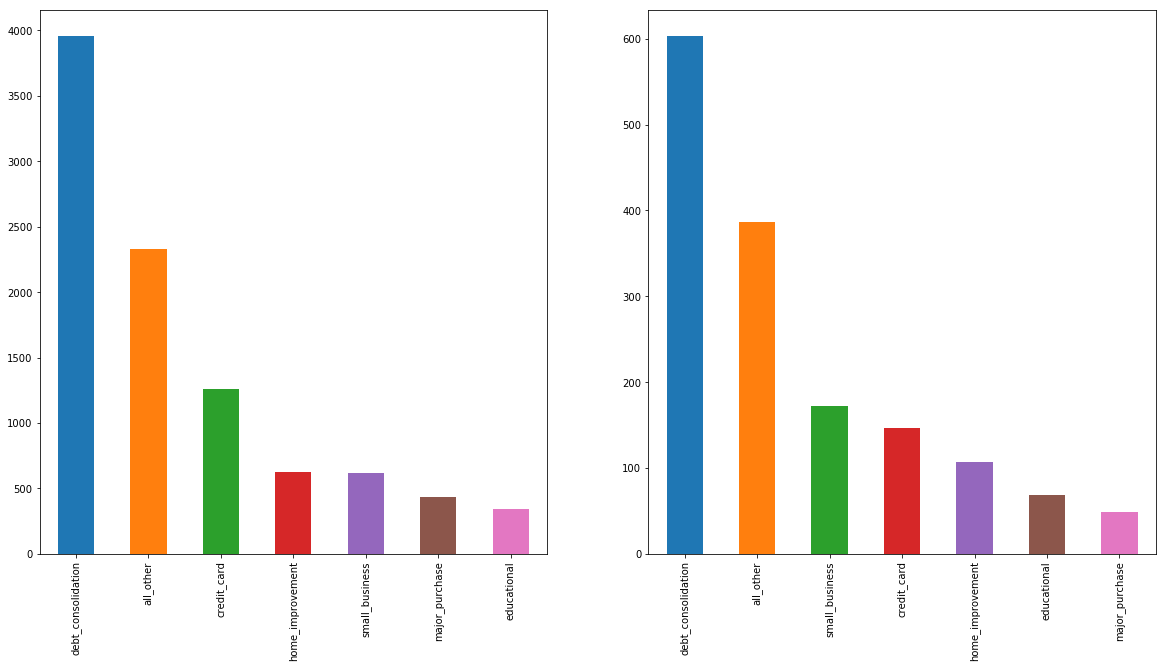

In [10]:
# Purpose vs paid back loan

fig , (ax1, ax2) = plt.subplots(1,2, figsize =(20,10))
ax1 = df['purpose'].value_counts().plot(kind = 'bar', ax=ax1)
df1 = df[df['paid.back.loan']== 'No']
ax2 = df1['purpose'].value_counts().plot(kind = 'bar', ax = ax2)

C:\Users\Hemant\.conda\envs\grey\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


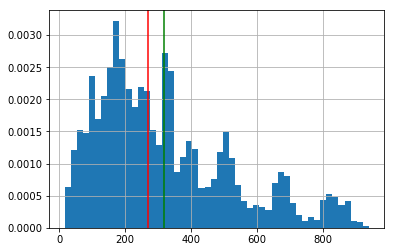

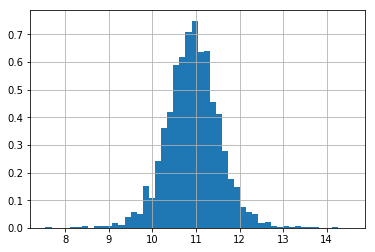

In [11]:
# Calculate median 
inst_median = df['installment'].median()
inst_mean = df['installment'].mean()

# histogram for installment
df['installment'].hist(normed = True, bins=50)
plt.axvline(x=inst_median,color='r')
plt.axvline(x=inst_mean,color='g')
plt.show()

#histogram for log anual income
df['log.annual.inc'].hist(normed = True, bins=50)
plt.show()

##### After completing this project, you will have a better understanding of probability. In this project, you will apply the following concepts.

* Independency check
* Bayes theorem
* Visualizing discrete variable
* Visualizing continuous variable